In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_dq import dq_report, Fix_DQ

Imported pandas_dq (1.22). Always upgrade to get latest features.



In [2]:
df = pd.read_csv('merged_df.csv', index_col=None)
# remove 

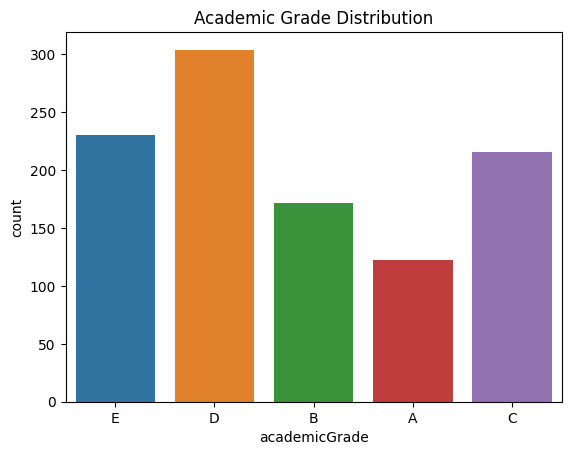

In [3]:
# looking at academic grade distribution

df["academicGrade"].value_counts()

# plot the distribution of academic grade
sns.countplot(x=df['academicGrade'], data=df)
plt.title('Academic Grade Distribution')
plt.show()
# Variables are not equally distributed, so we need to balance them

In [4]:
# remove absence_range, finalResult, 
df = df.drop(['absences_range', 'finalResult'], axis=1)
df = df[df['absences'] < 20]

In [5]:
# display only columns that are other than object
df.select_dtypes(exclude=['object']).columns

#  transform all non object to object type
df[['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel','freetime', 'goout', 'Dalc', 'Walc', 'health']] = df[['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel','freetime', 'goout', 'Dalc', 'Walc', 'health']].astype('object') 

In [6]:
df.select_dtypes(exclude=['object']).columns


Index(['age', 'absences', 'G1', 'G2', 'G3'], dtype='object')

In [7]:
columns_cat = df[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'G1', 'G2', 'G3',
       'academicGrade']]

continue_cols = df[['age','absences', 'G1', 'G2', 'G3']]



In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
import numpy as np
import pandas as pd  


X = df.drop('academicGrade', axis=1)
ct = make_column_transformer(
      (MinMaxScaler(),
       make_column_selector(dtype_include=np.number)),  # rating
      (OneHotEncoder(),
       make_column_selector(dtype_include=object)))  # city

X_preprocessed = ct.fit_transform(X)  

# Create a new dataframe with the preprocessing applied
feature_names = ct.get_feature_names_out()
new_df = pd.DataFrame(X_preprocessed, columns=feature_names)

In [ ]:
# make pipelone of regression models for multi classification on academic grade
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# ada boost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# gradient boost
from sklearn.ensemble import GradientBoostingClassifier
# xgboost
from xgboost import XGBClassifier
# lightgbm
# gread search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# split the data into train and test
X = new_df
y = df['academicGrade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y, shuffle=True)

# create a pipeline
pipe = Pipeline([('classifier', RandomForestClassifier())])


# create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"RandomForestClassifier": [RandomForestClassifier()],
                    'classifier__n_estimators': [50, 100, 200],
                    'classifier__max_depth': [None, 5, 10],
                    'classifier__min_samples_split': [2, 5, 10]},
                {"SVC": [SVC()],
                    "classifier__kernel": ['rbf', 'poly', 'sigmoid'],
                    "classifier__gamma": [0.1, 1, 10, 100],
                    "classifier__C": [0.1, 1, 10, 100, 1000]},
                {"AdaBoostClassifier": [AdaBoostClassifier()],
                    "classifier__n_estimators": [10, 100, 1000],
                    "classifier__learning_rate":[0.001,0.01,0.1,1,10],
                    "classifier__algorithm":['SAMME', 'SAMME.R']},
                {"GradientBoostingClassifier": [GradientBoostingClassifier()],
                    "classifier__n_estimators": [10, 100, 1000],
                    "classifier__learning_rate":[0.001,0.01,0.1,1,10],
                    "classifier__subsample":[0.5, 0.7, 1.0],
                    "classifier__max_depth":[3,5,10,20,50,100],
                    "classifier__max_features":['sqrt', 'log2']},
                {"XGBClassifier": [XGBClassifier()],
                    "classifier__n_estimators": [10, 100, 1000],
                    "classifier__learning_rate":[0.001,0.01,0.1,1,10],
                    "classifier__subsample":[0.5, 0.7, 1.0],
                    "classifier__max_depth":[3,5,10,20,50,100],
                    "classifier__max_features":['sqrt', 'log2']}]

# Define the pipeline
pipe = Pipeline([    ('classifier', RandomForestClassifier())])

# Define the parameter grid
param = [    {        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 5, 10],
        'classifier__min_samples_split': [2, 5, 10]
    },
    {
        'classifier': [LogisticRegression()],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [0.1, 1, 10]
    },
    {
        'classifier': [SVC()],
        'classifier__kernel': ['linear', 'rbf', 'poly'],
        'classifier__C': [0.1, 1, 10]
    },
    {
        'classifier': [AdaBoostClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 1, 10]
    },
    {
        'classifier': [GradientBoostingClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 1, 10],
        'classifier__max_depth': [3, 5, 10]
    },
    {
        'classifier': [XGBClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 1, 10],
        'classifier__max_depth': [3, 5, 10]
    }
]


# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, param, cv=5, verbose=1, n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

# print F1 score of each model on train
print("The best model F1 score on train is: ",best_model.score(X_train,y_train))

# print best model accuracy
print("The best model accuracy is: ",best_model.score(X_test,y_test))


In [ ]:
# split the data into train and test
X = new_df
y = df['academicGrade']

# import labelencoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y, shuffle=True)

# train the model
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2)
second_model = SVC(C=100, gamma=0.1, kernel='rbf')
third_model = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=1000)
fourth_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.5)

# fit the model
second_model.fit(X_train, y_train)
third_model.fit(X_train, y_train)
fourth_model.fit(X_train, y_train)
model.fit(X_train, y_train)
# evaluate the model on train and test display F1 score
print("The RamdomForest F1 score on train is: ",model.score(X_train,y_train))
print("The RamdomForest F1 score on test is: ",model.score(X_test,y_test))

print("The SVC F1 score on train is: ",second_model.score(X_train,y_train))
print("The SVC F1 score on test is: ",second_model.score(X_test,y_test))

print("The AdaBoost F1 score on train is: ",third_model.score(X_train,y_train))
print("The AdaBoost F1 score on test is: ",third_model.score(X_test,y_test))

print("The GradientBoosting F1 score on train is: ",fourth_model.score(X_train,y_train))
print("The GradientBoosting F1 score on test is: ",fourth_model.score(X_test,y_test))


# print classification report for train and test
predictions = model.predict(X_train)
print(classification_report(y_train,predictions))
print("------------------------------------------------------")
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))

# print confusion matrix for train and test

In [ ]:
# make a pipeline for multi classification on academic grade
from sklearn.pipeline import Pipeline

# split the data into train and test
X = new_df
y = df['academicGrade']

# import labelencoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y, shuffle=True)

# start the pipeline
pipe = Pipeline([('classifier', RandomForestClassifier())])

# create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"RandomForestClassifier": [RandomForestClassifier()],
                    'classifier__n_estimators': [50, 100, 200],
                    'classifier__max_depth': [None, 5, 10],
                    'classifier__min_samples_split': [2, 5, 10]},
                {"SVC": [SVC()],
                    "classifier__kernel": ['rbf', 'poly', 'sigmoid'],
                    "classifier__gamma": [0.1, 1, 10, 100],
                    "classifier__C": [0.1, 1, 10, 100, 1000]},
                {"AdaBoostClassifier": [AdaBoostClassifier()],
                    "classifier__n_estimators": [10, 100, 1000],
                    "classifier__learning_rate":[0.001,0.01,0.1,1,10],
                    "classifier__algorithm":['SAMME', 'SAMME.R']},
                {"GradientBoostingClassifier": [GradientBoostingClassifier()],
                    "classifier__n_estimators": [10, 100, 1000],
                    "classifier__learning_rate":[0.001,0.01,0.1,1,10],
                    "classifier__subsample":[0.5, 0.7, 1.0],
                    "classifier__max_depth":[3,5,10,20,50,100],
                    "classifier__max_features":['sqrt', 'log2']},
                {"XGBClassifier": [XGBClassifier()],
                    "classifier__n_estimators": [10, 100, 1000],
                    "classifier__learning_rate":[0.001,0.01,0.1,1,10],
                    "classifier__subsample":[0.5, 0.7, 1.0],
                    "classifier__max_depth":[3,5,10,20,50,100],
                    "classifier__max_features":['sqrt', 'log2']}]

# start the gridsearch
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=1, n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

# print F1 score of each model on train
print("The best model F1 score on train is: ",best_model.score(X_train,y_train))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Split the data into train and test sets
X = new_df
y = df['academicGrade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y, shuffle=True)

# Convert string labels to numbers using LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Define the pipeline and perform a grid search
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the features
    ('clf', RandomForestClassifier())  # Use a random forest classifier
])
params = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
}
grid_search = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Convert predicted numbers back to string labels using inverse_transform
y_pred = le.inverse_transform(y_pred)


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
# import train
from sklearn.model_selection import train_test_split
# remove warnings
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')


# import labelencoder
from sklearn.preprocessing import LabelEncoder
X = new_df
y = df['academicGrade']

le = LabelEncoder()
y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y, shuffle=True)

# Define the parameter grids for each algorithm
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga']
}

dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}

nb_params = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}

svm_params = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Create a list of models and their corresponding parameter grids
models = [
    (LogisticRegression(), lr_params),
    (DecisionTreeClassifier(), dt_params),
    (RandomForestClassifier(), rf_params),
    (KNeighborsClassifier(), knn_params),
    (MultinomialNB(), nb_params),
    (SVC(), svm_params)
]

# Loop through each model and perform a grid search
for model, param_grid in models:
    grid = GridSearchCV(model, param_grid, cv=5, verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)
    print("Best parameters for", model.__class__.__name__, ":", grid.best_params_)
    print("Train accuracy for", model.__class__.__name__, ":", grid.best_score_)
    print("Test accuracy for", model.__class__.__name__, ":", grid.score(X_test, y_test))


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linea

Best parameters for LogisticRegression : {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
Train accuracy for LogisticRegression : 0.6924941301219419
Test accuracy for LogisticRegression : 0.7745098039215687
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for DecisionTreeClassifier : {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Train accuracy for DecisionTreeClassifier : 1.0
Test accuracy for DecisionTreeClassifier : 1.0
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for RandomForestClassifier : {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Train accuracy for RandomForestClassifier : 0.9667954252821328
Test accuracy for RandomForestClassifier : 0.9754901960784313
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for KNeighborsClassifier : {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'}
Train accuracy for KNeighborsClassifier : 0.3197530864197531
T

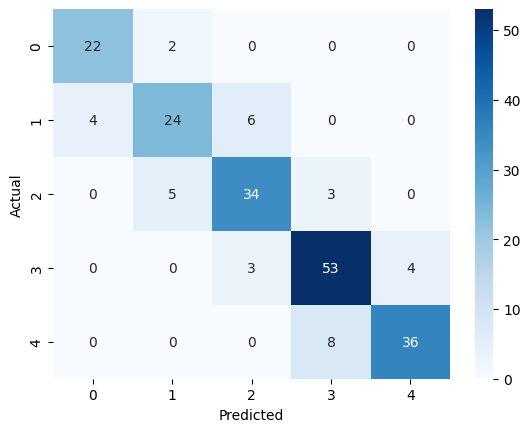

In [25]:

# get the best model
best_model = grid.best_estimator_

# make y_pred using the best model
y_pred = best_model.predict(X_test)

# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1', '2','3', '4'], yticklabels=['0', '1', '2','3', '4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

